# IMDB Data Project
Craig Gossen

**This project is to analyze what makes a movie successful and provide recommendations to the stakeholder on how to make a successful movie.** 

Data Source: (https://www.themoviedb.org/)


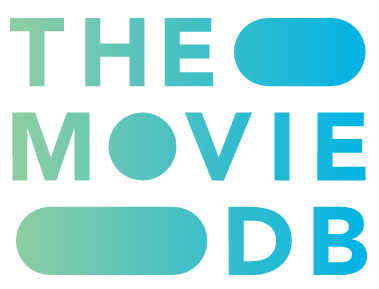

### Load prior data

In [1]:
# Imports
import pandas as pd

In [2]:
#Load the data
titles = pd.read_csv('Data/inprocess_titles.csv.gz', low_memory=False)
titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama


In [3]:
titles.shape

(84809, 9)

In [4]:
#Load the data
ratings = pd.read_csv('Data/inprocess_ratings.csv.gz', low_memory=False)
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1947
1,tt0000002,5.8,264
2,tt0000005,6.2,2580
3,tt0000006,5.1,177
4,tt0000007,5.4,810


In [5]:
ratings.shape

(486816, 3)

In [6]:
#Load the data
akas = pd.read_csv('Data/inprocess_akas.csv.gz', low_memory=False)
akas.head()


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [7]:
akas.shape

(1409832, 8)

### Load API

In [8]:
# Install tmdbsimple (only need to run once)
#!pip install tmdbsimple

In [9]:
#Import json and open credentials
import json
with open('/Users/craig/.secret/tmdb_api.json') as f: #change the path to match YOUR path!!
    login = json.load(f)
login.keys()

dict_keys(['session_id', 'api_key'])

In [10]:
#Import TMDB API with credentials
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api_key']

In [11]:
import datetime

### Extraction of Movie Data


In [22]:
## make a movie object using the .Movies function from tmdb
movie = tmdb.Movies(603)
info=movie.info()
info

{'adult': False,
 'backdrop_path': '/waCRuAW5ocONRehP556vPexVXA9.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 68.974,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 174,
   'logo_path': '/IuAlhI9eVC9Z8UQWOIDdWRKSEJ.png'

In [18]:
year = info['release_date'][:4] 
year


'1999'

In [20]:
budget = info['budget']
budget

63000000

The goal is to collect TMDB data ('budget', 'revenue' and 'certification')

In [25]:
#function to certification
def get_movie_with_rating(movie_id):   
    """Adapted from source = https://github.com/celiao/tmdbsimple"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    info = movie.info()
    
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return info

In [ ]:
results= []
errors= []

for movie_id in titleslist:
                
    try:
            movie_info = get_movie_with_rating(movie_id)
            results.append(movie_info)
    except Exception as e:
            errors.append([movie_id,e])
pd.DataFrame(results)

results

In [24]:
titleslist = titles['primaryTitle']
titleslist.head()

0                                       Kate & Leopold
1    The Tango of the Widower and Its Distorting Mi...
2                           The Other Side of the Wind
3                                    The Naked Monster
4                                 Crime and Punishment
Name: primaryTitle, dtype: object

In [87]:
movie2000 = tmdb.Movies('release_date') == "2000"
movie2000

False

In [84]:
## make a movie object using the .Movies function from tmdb
movie = tmdb.Movies()
movie

In [85]:
## movie objects have a .info dictionary 
info = movie.info()
info

HTTPError: 404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/0?api_key=bb23df4e5ffbe1784653df4941ea566e

In [80]:
discover = tmdb.Discover()
discover.movie(year=2001)

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/bNTHSd3UqqLzIVwbDOGPnx3ScfF.jpg',
   'genre_ids': [16, 35, 14, 12, 10751],
   'id': 808,
   'original_language': 'en',
   'original_title': 'Shrek',
   'overview': "It ain't easy bein' green -- especially if you're a likable (albeit smelly) ogre named Shrek. On a mission to retrieve a gorgeous princess from the clutches of a fire-breathing dragon, Shrek teams up with an unlikely compatriot -- a wisecracking donkey.",
   'popularity': 244.459,
   'poster_path': '/o04jZs5SXhbvhqO4981W7KJXOWZ.jpg',
   'release_date': '2001-05-18',
   'title': 'Shrek',
   'video': False,
   'vote_average': 7.7,
   'vote_count': 14826},
  {'adult': False,
   'backdrop_path': '/5jkE2SzR5uR2egEb1rRhF22JyWN.jpg',
   'genre_ids': [12, 14],
   'id': 671,
   'original_language': 'en',
   'original_title': "Harry Potter and the Philosopher's Stone",
   'overview': "Harry Potter has lived under the stairs at his aunt and uncle's house his whole life. B

### Class Notes

In [83]:
## movie objects have a .info dictionary 
info = movie.info()
info

HTTPError: 404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/0?api_key=bb23df4e5ffbe1784653df4941ea566e

In [67]:
year = info['release_date'][:4] 
year

'2021'

In [72]:
year = info['release_date'][:4] =="2000"
year

False

In [ ]:
#Keep startYear between 2000 (including) and 2022 (including)
titles = titles.query('startYear >= "2000" & startYear <= "2022"')
titles.shape

In [37]:
info['budget']


63000000

In [38]:
info['revenue']

463517383

In [39]:
info['imdb_id']

'tt0133093'

In [40]:
#Search 
movie = tmdb.Movies('tt1361336')
info = movie.info()
info['budget']

50000000

In [41]:
# example from package README
# source = https://github.com/celiao/tmdbsimple
releases = movie.releases()
for c in releases['countries']:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

PG
PG
PG


In [43]:
#function to certification
def get_movie_with_rating(movie_id):   
    """Adapted from source = https://github.com/celiao/tmdbsimple"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    info = movie.info()
    
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return info

In [44]:
test = get_movie_with_rating("tt0848228") #put your function name here
test



{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 124.056,
 'poster_path': '/tYqp6vEOo8YlVWrYQvt9nyOhsA2.jpg',
 'production_companies': [{'id': 420,
   'logo_pat

### Looping through titles dataframe

In [47]:
## testing our function by looping through a list of ids
import pandas as pd
test_ids = ["tt0848228", "tt0115937","tt0848228","tt0332280"]
results = []
errors = []
for movie_id in test_ids:
    
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except Exception as e:
        errors.append([movie_id,e])
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.707,28118,PG-13
1,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.707,28118,PG-13
2,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.878,10110,PG-13


In [48]:
print(f"- Number of errors: {len(errors)}")
errors

- Number of errors: 1


[['tt0115937',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0115937?api_key=bb23df4e5ffbe1784653df4941ea566e')]]